# Customer segamentation for E-commerce using RFM analysis and clustering

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [3]:
data = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")
data.head(30)

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied
5,106,Female,37,Houston,Bronze,440.80,8,3.1,False,22,Neutral
6,107,Female,31,New York,Gold,1150.60,15,4.5,True,28,Satisfied
7,108,Male,35,Los Angeles,Silver,800.90,12,4.2,False,14,Neutral
8,109,Female,41,Chicago,Bronze,495.25,10,3.6,True,40,Unsatisfied
9,110,Male,28,San Francisco,Gold,1520.10,21,4.8,False,9,Satisfied


In [5]:
data.dtypes

Customer ID                   int64
Gender                       object
Age                           int64
City                         object
Membership Type              object
Total Spend                 float64
Items Purchased               int64
Average Rating              float64
Discount Applied               bool
Days Since Last Purchase      int64
Satisfaction Level           object
dtype: object

# Data Cleaning

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [10]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer ID,350.0,275.500000,101.180532,101.0,188.25,275.5,362.75,450.0
Age,350.0,33.597143,4.870882,26.0,30.00,32.5,37.00,43.0
Total Spend,350.0,845.381714,362.058695,410.8,502.00,775.2,1160.60,1520.1
Items Purchased,350.0,12.600000,4.155984,7.0,9.00,12.0,15.00,21.0
Average Rating,350.0,4.019143,0.580539,3.0,3.50,4.1,4.50,4.9
Days Since Last Purchase,350.0,26.588571,13.440813,9.0,15.00,23.0,38.00,63.0


In [12]:
data.isnull().mean()*100

Customer ID                 0.000000
Gender                      0.000000
Age                         0.000000
City                        0.000000
Membership Type             0.000000
Total Spend                 0.000000
Items Purchased             0.000000
Average Rating              0.000000
Discount Applied            0.000000
Days Since Last Purchase    0.000000
Satisfaction Level          0.571429
dtype: float64

In [14]:
data.dropna(inplace=True)

In [16]:
data.isnull().mean()*100

Customer ID                 0.0
Gender                      0.0
Age                         0.0
City                        0.0
Membership Type             0.0
Total Spend                 0.0
Items Purchased             0.0
Average Rating              0.0
Discount Applied            0.0
Days Since Last Purchase    0.0
Satisfaction Level          0.0
dtype: float64

In [18]:
data.duplicated().mean()*100

0.0

### Analysis and RFM table (Recency, Frequency and Monetary)

### Recency

In [22]:
Recency = data["Days Since Last Purchase"]

In [24]:
Recency.describe().T

count    348.000000
mean      26.614943
std       13.474750
min        9.000000
25%       15.000000
50%       23.000000
75%       38.000000
max       63.000000
Name: Days Since Last Purchase, dtype: float64

- This column would tell how recently a customer purchased a good  like we can say that min purchase day was 9 and max was purchase after 63 days

### Frequency

In [28]:
Frequency =  data["Items Purchased"]

In [30]:
Frequency.describe().T

count    348.000000
mean      12.632184
std        4.146079
min        7.000000
25%        9.000000
50%       12.000000
75%       15.000000
max       21.000000
Name: Items Purchased, dtype: float64

- This column would tell how often the customer makes purchases

### Monetary

In [34]:
Monetary = data['Total Spend']

In [36]:
Monetary.describe().T

count     348.000000
mean      847.793103
std       361.692375
min       410.800000
25%       505.750000
50%       780.200000
75%      1160.600000
max      1520.100000
Name: Total Spend, dtype: float64

- This columns would tell how much money customer spends on the purchase

### RFM Table

In [46]:
rfm = data[['Customer ID', 'Days Since Last Purchase', 'Items Purchased', 'Total Spend','Gender','Age','City','Membership Type', 'Average Rating', 'Discount Applied', 'Satisfaction Level']].copy()
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary','Gender','Age','City','Membership Type','Average Rating', 'Discount Applied', 'Satisfaction Level']
rfm.head(30)

,CustomerID,Recency,Frequency,Monetary,Gender,Age,City,Membership Type,Average Rating,Discount Applied,Satisfaction Level
0,101,25,14,1120.20,Female,29,New York,Gold,4.6,True,Satisfied
1,102,18,11,780.50,Male,34,Los Angeles,Silver,4.1,False,Neutral
2,103,42,9,510.75,Female,43,Chicago,Bronze,3.4,True,Unsatisfied
3,104,12,19,1480.30,Male,30,San Francisco,Gold,4.7,False,Satisfied
4,105,55,13,720.40,Male,27,Miami,Silver,4.0,True,Unsatisfied
5,106,22,8,440.80,Female,37,Houston,Bronze,3.1,False,Neutral
6,107,28,15,1150.60,Female,31,New York,Gold,4.5,True,Satisfied
7,108,14,12,800.90,Male,35,Los Angeles,Silver,4.2,False,Neutral
8,109,40,10,495.25,Female,41,Chicago,Bronze,3.6,True,Unsatisfied
9,110,9,21,1520.10,Male,28,San Francisco,Gold,4.8,False,Satisfied


--- Conclusion: 
-If low recency then we have higher active customer
-If high frequency then we have more loyal customers
-If higher monetary then we have more valuable customers

In [82]:
RFM = data[['Customer ID', 'Days Since Last Purchase', 'Items Purchased', 'Total Spend']].copy()
RFM.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
RFM.head()

,CustomerID,Recency,Frequency,Monetary
0,101,25,14,1120.20
1,102,18,11,780.50
2,103,42,9,510.75
3,104,12,19,1480.30
4,105,55,13,720.40


## Visualization

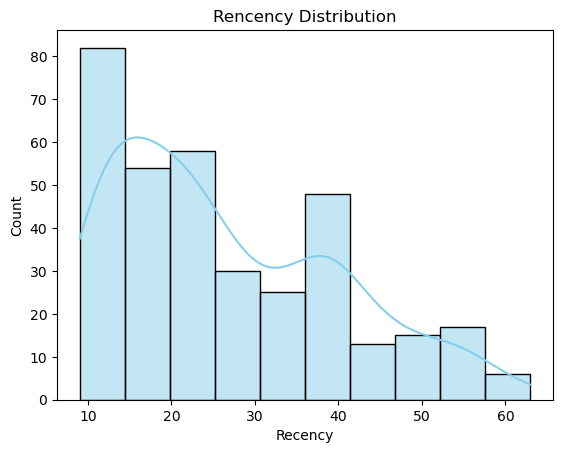

In [84]:
plt.plot(figsize=(20,5))
sns.histplot(data=RFM, x="Recency", kde=True, color="skyblue")
plt.title("Rencency Distribution")
plt.show()

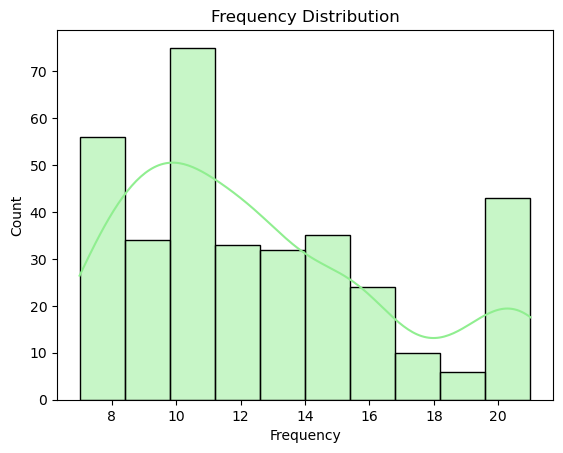

In [86]:
plt.plot(figsize=(20,5))
sns.histplot(data=RFM, x="Frequency", kde=True, color="lightgreen")
plt.title("Frequency Distribution")
plt.show()

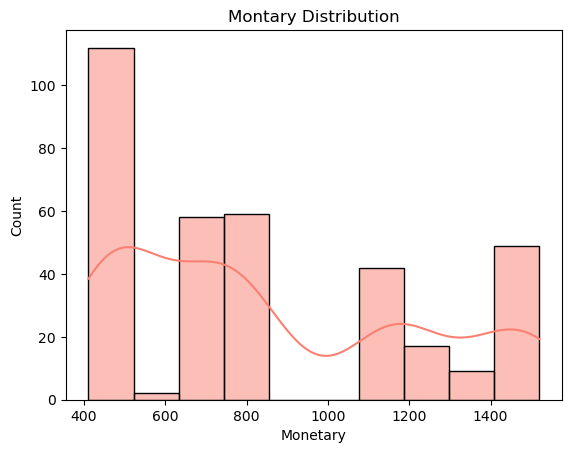

In [88]:
plt.plot(figsize=(20,5))
sns.histplot(data=RFM, x="Monetary", kde=True, color="salmon")
plt.title("Montary Distribution")
plt.show()

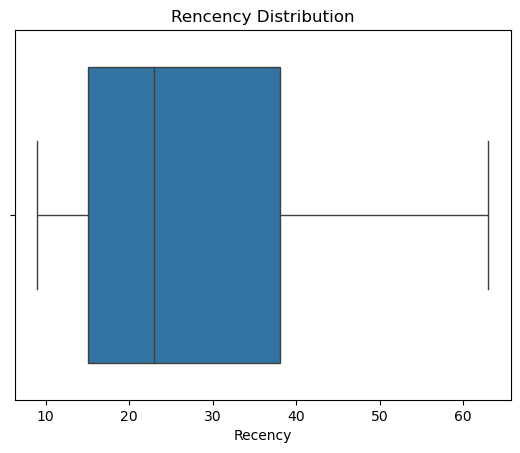

In [90]:
sns.boxplot(x="Recency", data=RFM)
plt.title("Rencency Distribution")
plt.show()

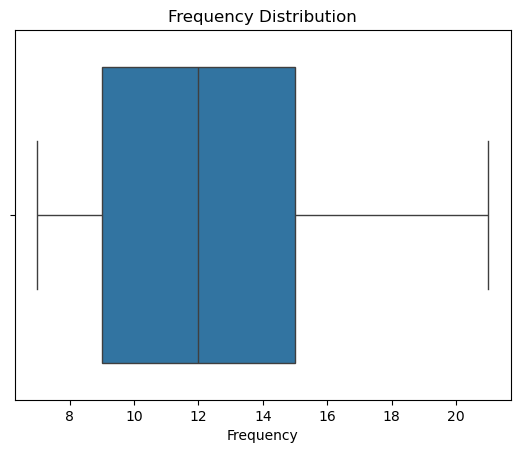

In [92]:
sns.boxplot(x="Frequency", data=RFM)
plt.title("Frequency Distribution")
plt.show()

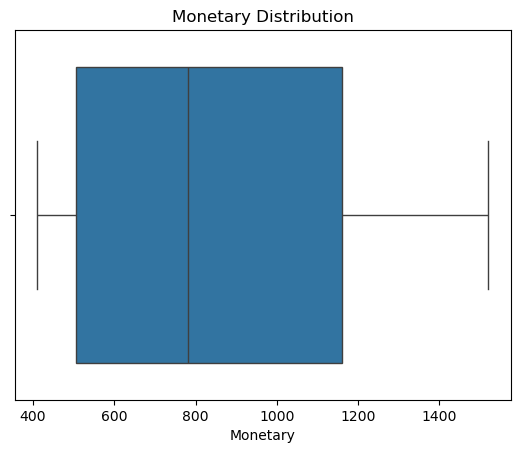

In [94]:
sns.boxplot(x="Monetary", data=RFM)
plt.title("Monetary Distribution")
plt.show()

### Analysing other columns like Membership type and Satisfaction level

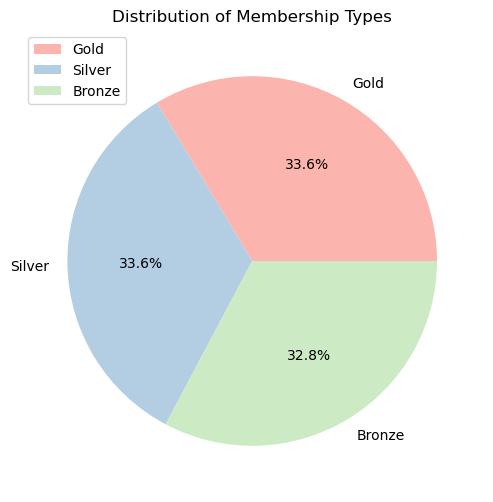

In [96]:
membership_counts = data['Membership Type'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=membership_counts.values,
    labels=membership_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Pastel1.colors 
)
plt.title("Distribution of Membership Types")
plt.legend()
plt.show()

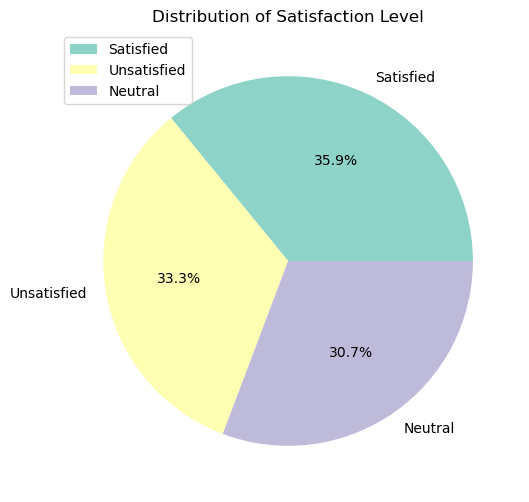

In [98]:
Satisfaction_counts = data['Satisfaction Level'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(
    x=Satisfaction_counts.values,
    labels=Satisfaction_counts.index,
    autopct='%1.1f%%',
    colors=plt.cm.Set3.colors 
)
plt.title("Distribution of Satisfaction Level")
plt.legend()
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_37760\1407219723.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Membership Type', y='Total Spend', palette='coolwarm')


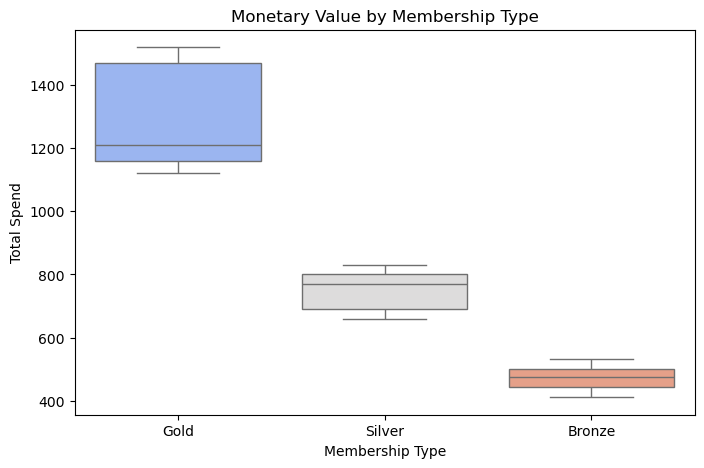

In [104]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Membership Type', y='Total Spend', palette='coolwarm')
plt.title('Monetary Value by Membership Type')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_37760\1059725935.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Satisfaction Level', y='Days Since Last Purchase', palette='viridis')


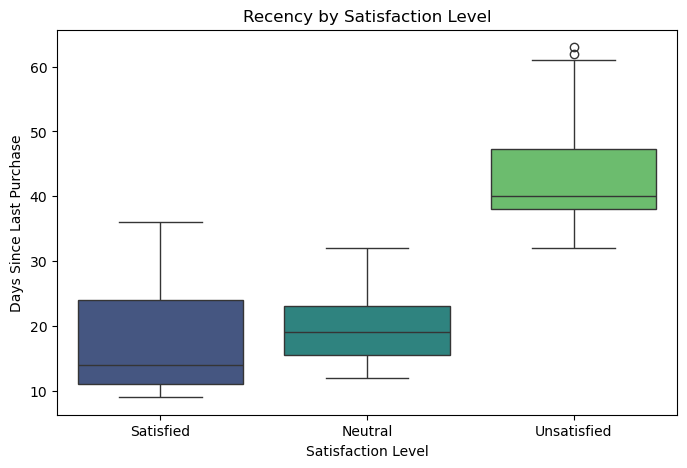

In [106]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x='Satisfaction Level', y='Days Since Last Purchase', palette='viridis')
plt.title('Recency by Satisfaction Level')
plt.show()

# Clustering

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

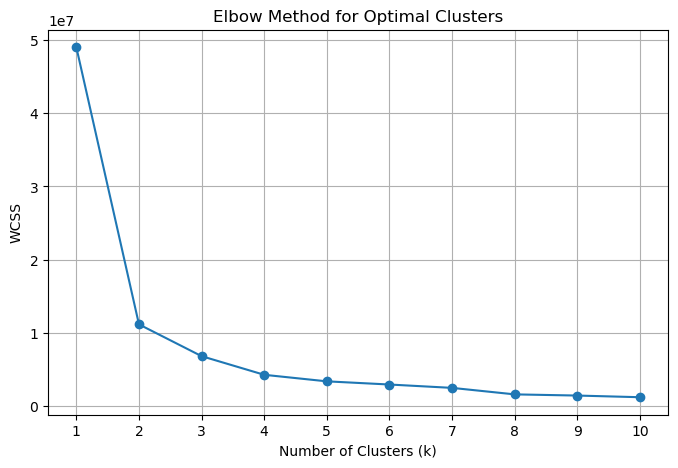

In [108]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(RFM)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [116]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
RFM['Cluster'] = kmeans.fit_predict(RFM)

C:\Users\Acer\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [118]:
RFM.groupby('Cluster').mean().round(2)

,CustomerID,Recency,Frequency,Monetary
Cluster,,,,
0,277.56,31.78,8.52,474.22
1,274.57,17.94,17.62,1311.14
2,275.57,30.26,11.66,748.43


###  Conclusion
 -  Cluster 0 Low-Value / At-Risk
    -  Recency: 31.78 → Haven’t purchased recently
    -  Frequency: 8.52 → Less frequent buyers
    -  Monetary: 474.22 → Lowest spend
    -  These are low-engagement customers — need promotions, reminders
 -  Cluster 1 Best Customers
    -  Recency: 17.94 → Recent buyers
    -  Frequency: 17.62 → Buy frequently
    -  Monetary: 1311.14 → Spend the most
    -  These are your loyal, high-value customers (retain them!)
 -  Cluster 2 Potential
    -  Recency: 30.26 → Less recent
    -  Frequency: 11.66 → Medium purchases
    -  Monetary: 748.43 → Moderate spend
    -  These are good customers but may be losing interest — can be reactivated

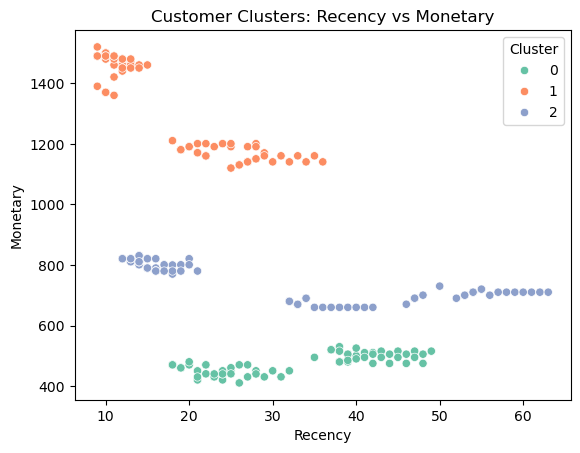

In [120]:
sns.scatterplot(data=RFM, x='Recency', y='Monetary', hue='Cluster', palette='Set2')
plt.title('Customer Clusters: Recency vs Monetary')
plt.show()

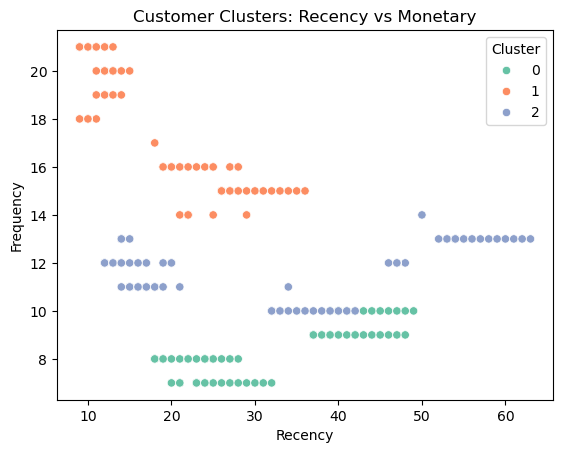

In [122]:
sns.scatterplot(data=RFM, x='Recency', y='Frequency', hue='Cluster', palette='Set2')
plt.title('Customer Clusters: Recency vs Frequency')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_37760\2879324383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')
C:\Users\Acer\AppData\Local\Temp\ipykernel_37760\2879324383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')
C:\Users\Acer\AppData\Local\Temp\ipykernel_37760\2879324383.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')


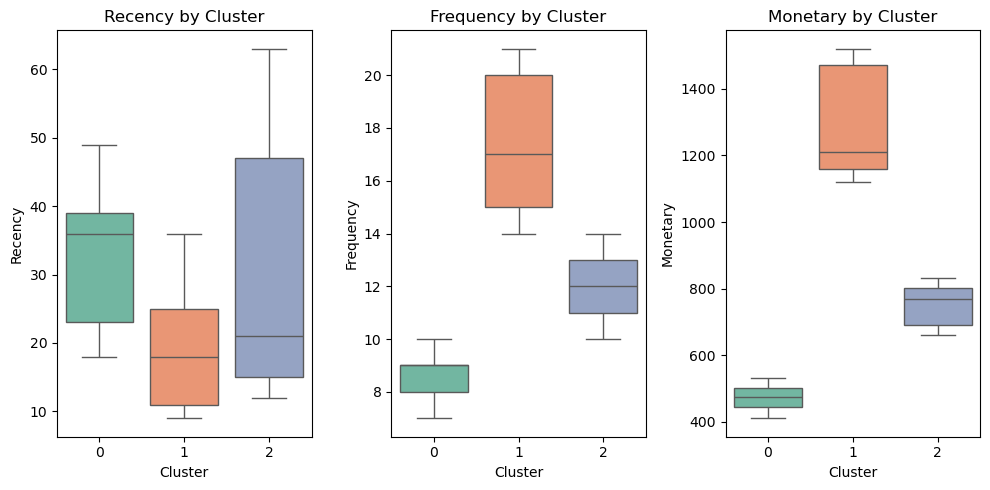

In [124]:
plt.figure(figsize=(10, 5))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x='Cluster', y=feature, data=rfm, palette='Set2')
    plt.title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

In [128]:
rfm.to_csv('Customer_segemantation_cleaned_dataset.csv', index=False)